In [179]:
import pandas
#pandas.set_option("display.max_rows", 50, "display.max_columns", 50)

import numpy
import pygsheets
import scipy.stats
import datetime

import matplotlib.pyplot as mp
import matplotlib

import geopandas
import cartopy
import shapely

In [180]:
# import the proper table
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('1AwdoryIA-fuBXf_yYL-uKKYR3CLxtm7-8R0gG2chth8')

fig1_data_df = spreadsheet.worksheet('title', 'Figure 1 (data for plot)').get_as_df()
#fig2_data_df = spreadsheet.worksheet('title', 'Figure 2 (data for plot)').get_as_df()
fig3_data_df = spreadsheet.worksheet('title', 'Figure ES1/3 (data for plot)').get_as_df()

fig1_data_df.replace('',0,inplace=True)
#fig2_data_df.replace('',numpy.nan,inplace=True)
fig3_data_df.replace('',numpy.nan,inplace=True)

In [181]:
# import terminals data

# colors

In [182]:
cmap_to_sample = matplotlib.cm.get_cmap('Oranges')
plot_yellow = cmap_to_sample(0.6)
plot_orange = cmap_to_sample(0.35)
plot_red = cmap_to_sample(0.1)

cmap_to_sample = matplotlib.cm.get_cmap('viridis')
plot_dkpurple = cmap_to_sample(0)
plot_purple = cmap_to_sample(0.25)
plot_blue = cmap_to_sample(0.5)
plot_green = cmap_to_sample(0.75)

solar_yellow    = '#b58900'
solar_orange    = '#cb4b16'

sel_cmap = matplotlib.cm.get_cmap('Reds')
tracker_operating = sel_cmap(0.999)
tracker_construction = sel_cmap(0.8)
tracker_proposed = sel_cmap(0.6)
tracker_shelved = sel_cmap(0.4)
tracker_cancelled = sel_cmap(0.2)

/var/folders/fl/t07mc8053p33mn6mdmvp45580000gn/T/ipykernel_3039/3121099301.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_to_sample = matplotlib.cm.get_cmap('Oranges')
/var/folders/fl/t07mc8053p33mn6mdmvp45580000gn/T/ipykernel_3039/3121099301.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_to_sample = matplotlib.cm.get_cmap('viridis')
/var/folders/fl/t07mc8053p33mn6mdmvp45580000gn/T/ipykernel_3039/3121099301.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

# figure 3

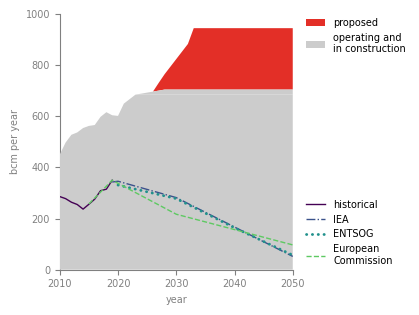

In [242]:
font_size = 7
shade_alpha = 1# 0.75
lw_all = 1
axis_color='0.5'

fig = mp.figure(figsize=(3.25,3.25))

ax = fig.add_subplot(111)

cmap_to_sample = matplotlib.colormaps['Reds']

f1=ax.fill_between(fig3_data_df.Year,fig3_data_df['existing capacity'], 
                fc='0.8', ec='None', alpha=shade_alpha, zorder=6)#,
                #label='existing')

f2=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['existing capacity'][12:],
                fig3_data_df['capacity under construction'][12:],
                fc='0.8', ec='None', zorder=5, alpha=shade_alpha)#,
                #label='construction')

f3=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['capacity under construction'][12:],
                fig3_data_df['proposed capacity'][12:],
                fc=cmap_to_sample(0.666), ec='None', alpha=shade_alpha)#,
                #label='proposed')

# ****************************************

existing_capacity = 598 #655
total_russia_imports = 247.0977
capacity_without_russia = existing_capacity-total_russia_imports

#mp.rcParams['hatch.color'] = plot_russia
mp.rcParams['hatch.linewidth'] = 1

# ****************************************

l1,=ax.plot(fig3_data_df[~fig3_data_df['historical'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['historical'].isnull()]['historical'],
        c=plot_dkpurple, zorder=14, lw=lw_all)#, label='historical')

l2,=ax.plot(fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['IEA (2020) Sustainable Development scenario'],
        c=plot_purple, zorder=15, lw=lw_all, ls='-.')#, label='IEA')

l3,=ax.plot(fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['ENTSOG (2021)'],
        c=plot_blue, zorder=16, lw=lw_all*2,# label='ENTSOG'
        linestyle=(0,(0.1,2)),
        dash_capstyle='round')

l4,=ax.plot(fig3_data_df[~fig3_data_df['European Commission'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['European Commission'].isnull()]['European Commission'],
        c=plot_green, zorder=17, lw=lw_all,# label='European\nCommission',
        ls='--')

ax.set_xlim(2010,2050)
ax.set_ylim(0,1000)
ax.tick_params(labelsize=font_size)

ax.set_ylabel('bcm per year', fontsize=font_size, color=axis_color)
ax.set_xlabel('year', fontsize=font_size, color=axis_color)

fig.tight_layout()

legend_lines = ax.legend([l1,l2,l3,l4], 
                         ['historical','IEA','ENTSOG','European\nCommission'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,0), loc='lower left',
                         labelspacing=0.5, borderaxespad=0)

legend_fill = ax.legend([f3,f2],#,f4], 
                         ['proposed','operating and\nin construction'],#,'maximum Russian\npipeline imports\n(2022 onward)'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,1), loc='upper left',
                         labelspacing=0.5, borderaxespad=0, ncol=1)

ax.add_artist(legend_lines)

ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_zorder(0)

fig.savefig('figure-drafts/Fig2-updated-Euro-Gas-Report-figure-historical-future.pdf', bbox_inches='tight', transparent=True)
fig.savefig('figure-drafts/Fig2-updated-Gas-Report-figure-historical-future.png', bbox_inches='tight', dpi=600)

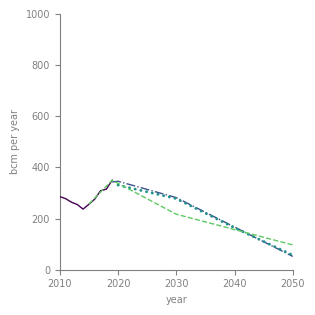

In [241]:
font_size = 7
shade_alpha = 1# 0.75
lw_all = 1
axis_color='0.5'

fig = mp.figure(figsize=(3.25,3.25))

ax = fig.add_subplot(111)

cmap_to_sample = matplotlib.colormaps['Reds']

# f1=ax.fill_between(fig3_data_df.Year,fig3_data_df['existing capacity'], 
#                 fc='0.75', ec='None', alpha=shade_alpha, zorder=6)#,
#                 #label='existing')

# f2=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['existing capacity'][12:],
#                 fig3_data_df['capacity under construction'][12:],
#                 fc=cmap_to_sample(0.666), ec='None', zorder=5, alpha=shade_alpha)#,
#                 #label='construction')

# f3=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['capacity under construction'][12:],
#                 fig3_data_df['proposed capacity'][12:],
#                 fc=cmap_to_sample(0.333), ec='None', alpha=shade_alpha)#,
#                 #label='proposed')

# ****************************************

existing_capacity = 598 #655
total_russia_imports = 247.0977
capacity_without_russia = existing_capacity-total_russia_imports

#mp.rcParams['hatch.color'] = plot_russia
mp.rcParams['hatch.linewidth'] = 1

# ****************************************

l1,=ax.plot(fig3_data_df[~fig3_data_df['historical'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['historical'].isnull()]['historical'],
        c=plot_dkpurple, zorder=14, lw=lw_all)#, label='historical')

l2,=ax.plot(fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['IEA (2020) Sustainable Development scenario'],
        c=plot_purple, zorder=15, lw=lw_all, ls='-.')#, label='IEA')

l3,=ax.plot(fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['ENTSOG (2021)'],
        c=plot_blue, zorder=16, lw=lw_all*2,# label='ENTSOG'
        linestyle=(0,(0.1,2)),
        dash_capstyle='round')

l4,=ax.plot(fig3_data_df[~fig3_data_df['European Commission'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['European Commission'].isnull()]['European Commission'],
        c=plot_green, zorder=17, lw=lw_all,# label='European\nCommission',
        ls='--')

ax.set_xlim(2010,2050)
ax.set_ylim(0,1000)
ax.tick_params(labelsize=font_size)

ax.set_ylabel('bcm per year', fontsize=font_size, color=axis_color)
ax.set_xlabel('year', fontsize=font_size, color=axis_color)

fig.tight_layout()

# legend_lines = ax.legend([l1,l2,l3,l4], 
#                          ['historical','IEA','ENTSOG','European\nCommission'],
#                          fontsize=font_size, frameon=False, 
#                          bbox_to_anchor=(1.04,0), loc='lower left',
#                          labelspacing=0.5, borderaxespad=0)

# legend_fill = ax.legend([f3,f2,f1],#,f4], 
#                          ['proposed','construction','operating'],#,'maximum Russian\npipeline imports\n(2022 onward)'],
#                          fontsize=font_size, frameon=False, 
#                          bbox_to_anchor=(1.04,1), loc='upper left',
#                          labelspacing=0.5, borderaxespad=0, ncol=1)

# ax.add_artist(legend_lines)

ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_zorder(0)

fig.savefig('figure-drafts/Fig2-updated-Euro-Gas-Report-figure-historical-future-lines-only.pdf', bbox_inches='tight', transparent=True)
fig.savefig('figure-drafts/Fig2-updated-Gas-Report-figure-historical-future-lines-only.png', bbox_inches='tight', dpi=600)

# figure 3 - with gas crisis boxes

import terminals

In [216]:
credentials_directory = '/Users/baird/Dropbox/_google-api/'
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
#spreadsheet = gc.open_by_key('1tcS6Wd-Wp-LTDpLzFgJY_RSNDnbyubW3J_9HKIAys4A')
#spreadsheet = gc.open_by_key('1BHiidrJnzh96Em3KrqBpCoWaJ3GB5OeCY9dHVaEDEFs') # mar 22 2022 version for EGT
spreadsheet = gc.open_by_key('1d0kLE0WmAn9b4XdugffiEaAHGWy6EhyF7zY1DM12zCc') # 1 Mar 2023 version for EGT report

#spreadsheet[1] "Gas Pipelines" tab is the second index
terms_df_orig = spreadsheet.worksheet('title', 'Terminals').get_as_df(start='A2')
region_df_orig = spreadsheet.worksheet('title', 'Region dictionary').get_as_df(start='A2')

region_df_eu = region_df_orig.copy()[region_df_orig['EuropeanUnion']=='Yes']
region_df_touse = region_df_eu.copy()

# replace all -- with nans
terms_df_orig.replace('--', numpy.nan, inplace=True)
# only keep LNG terminals (remove oil)
terms_df_orig = terms_df_orig.loc[terms_df_orig.Fuel=='LNG']
# remove anything without a wiki page
terms_df_orig = terms_df_orig.loc[terms_df_orig.Wiki!='']
# remove N/A statuses
terms_df_orig = terms_df_orig.loc[terms_df_orig.Status!='']

terms_df_touse = terms_df_orig.loc[(terms_df_orig['Country'].isin(region_df_touse['Country']))&
                                   (terms_df_orig.Fuel=='LNG')]
terms_df_touse_imports = terms_df_touse.loc[(terms_df_orig['Country'].isin(region_df_touse['Country']))&
                                            (terms_df_touse['Import/Export']=='Import')]

In [217]:
terms_euro_crisis_operating = terms_df_touse_imports.loc[(terms_df_touse_imports.EuroCrisisTracker=='yes')&
                           (terms_df_touse_imports.Status=='Operating')][['CapacityInBcm/y','StartYearEarliest']]

terms_euro_crisis_const = terms_df_touse_imports.loc[(terms_df_touse_imports.EuroCrisisTracker=='yes')&
                           (terms_df_touse_imports.Status=='Construction')][['CapacityInBcm/y','StartYearEarliest']]

terms_euro_crisis_prop = terms_df_touse_imports.loc[(terms_df_touse_imports.EuroCrisisTracker=='yes')&
                           (terms_df_touse_imports.Status=='Proposed')][['CapacityInBcm/y','StartYearEarliest']]

In [218]:
terms_euro_crisis_operating.groupby('StartYearEarliest').sum().cumsum()

,CapacityInBcm/y
StartYearEarliest,
2022,16.63
2023,34.13


In [219]:
terms_euro_crisis_const.groupby('StartYearEarliest').sum().cumsum()

,CapacityInBcm/y
StartYearEarliest,
2023,5.0


In [220]:
terms_euro_crisis_prop.groupby('StartYearEarliest').sum().cumsum()

,CapacityInBcm/y
StartYearEarliest,
2023,39.60
2024,57.68
2025,92.68
2026,133.98


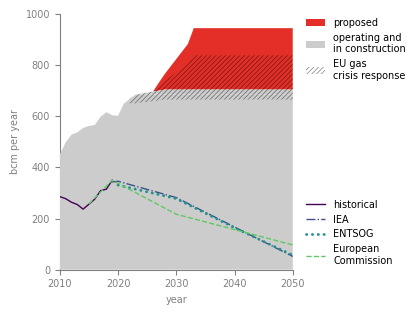

In [262]:
font_size = 7
shade_alpha = 1# 0.75
lw_all = 1
axis_color='0.5'

fig = mp.figure(figsize=(3.25,3.25))

ax = fig.add_subplot(111)

cmap_to_sample = matplotlib.colormaps['Reds']

f1=ax.fill_between(fig3_data_df.Year,fig3_data_df['existing capacity'], 
                fc='0.8', ec='None', alpha=shade_alpha, zorder=6)#,
                #label='existing')

f2=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['existing capacity'][12:],
                fig3_data_df['capacity under construction'][12:],
                fc='0.8', ec='None', zorder=5, alpha=shade_alpha)#,
                #label='construction')

f3=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['capacity under construction'][12:],
                fig3_data_df['proposed capacity'][12:],
                fc=cmap_to_sample(0.666), ec='None', alpha=shade_alpha)#,
                #label='proposed')

f4=ax.fill_between(fig3_data_df.Year[12:],
                   fig3_data_df['capacity under construction'][12:]-fig3_data_df['LNG crisis response (operating)'][12:]-fig3_data_df['LNG crisis response (construction)'][12:],
                   fig3_data_df['capacity under construction'][12:],
                   ec='black', fc='None', linewidth=0, zorder=10, alpha=0.5, hatch='///////')
# f5=ax.fill_between(fig3_data_df.Year[12:],
#                    fig3_data_df['capacity under construction'][12:]-fig3_data_df['LNG crisis response (construction)'][12:],
#                    fig3_data_df['capacity under construction'][12:],
#                    ec='black', fc='None', linewidth=0, zorder=10, alpha=0.5, hatch='//////////')

f6=ax.fill_between(fig3_data_df.Year[12:],
                  fig3_data_df['capacity under construction'][12:]+fig3_data_df['LNG crisis response (proposed)'][12:],
                  fig3_data_df['capacity under construction'][12:],
                  ec='black', fc='None', linewidth=0, zorder=10, alpha=0.5, hatch='///////')

# ****************************************

existing_capacity = 598 #655
total_russia_imports = 247.0977
capacity_without_russia = existing_capacity-total_russia_imports

#mp.rcParams['hatch.color'] = plot_russia
mp.rcParams['hatch.linewidth'] = 0.5

# ****************************************

l1,=ax.plot(fig3_data_df[~fig3_data_df['historical'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['historical'].isnull()]['historical'],
        c=plot_dkpurple, zorder=14, lw=lw_all)#, label='historical')

l2,=ax.plot(fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['IEA (2020) Sustainable Development scenario'],
        c=plot_purple, zorder=15, lw=lw_all, ls='-.')#, label='IEA')

l3,=ax.plot(fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['ENTSOG (2021)'],
        c=plot_blue, zorder=16, lw=lw_all*2,# label='ENTSOG'
        linestyle=(0,(0.1,2)),
        dash_capstyle='round')

l4,=ax.plot(fig3_data_df[~fig3_data_df['European Commission'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['European Commission'].isnull()]['European Commission'],
        c=plot_green, zorder=17, lw=lw_all,# label='European\nCommission',
        ls='--')

ax.set_xlim(2010,2050)
ax.set_ylim(0,1000)
ax.tick_params(labelsize=font_size)

ax.set_ylabel('bcm per year', fontsize=font_size, color=axis_color)
ax.set_xlabel('year', fontsize=font_size, color=axis_color)

fig.tight_layout()

legend_lines = ax.legend([l1,l2,l3,l4], 
                         ['historical','IEA','ENTSOG','European\nCommission'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,0), loc='lower left',
                         labelspacing=0.5, borderaxespad=0)

legend_fill = ax.legend([f3,f2,f4],#,f_russia], 
                         ['proposed','operating and\nin construction',
                          'EU gas\ncrisis response'],
                          #'maximum Russian\npipeline imports\n(2022 onward)'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,1), loc='upper left',
                         labelspacing=0.5, borderaxespad=0, ncol=1)

ax.add_artist(legend_lines)

ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_zorder(0)

fig.savefig('figure-drafts/Fig2-updated-Euro-Gas-Report-figure-historical-future-stippled.pdf', bbox_inches='tight', transparent=True)
fig.savefig('figure-drafts/Fig2-updated-Gas-Report-figure-historical-future-stippled.png', bbox_inches='tight', dpi=600)

### with Russia chunk

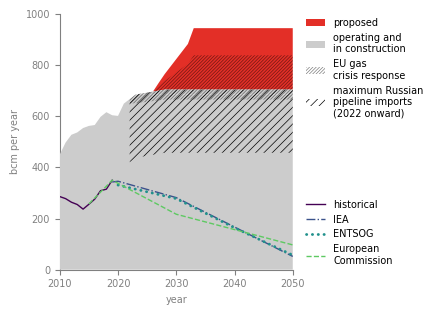

In [258]:
font_size = 7
shade_alpha = 1# 0.75
lw_all = 1
axis_color='0.5'

fig = mp.figure(figsize=(3.25,3.25))

ax = fig.add_subplot(111)

cmap_to_sample = matplotlib.colormaps['Reds']

f1=ax.fill_between(fig3_data_df.Year,fig3_data_df['existing capacity'], 
                fc='0.8', ec='None', alpha=shade_alpha, zorder=6)#,
                #label='existing')

f2=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['existing capacity'][12:],
                fig3_data_df['capacity under construction'][12:],
                fc='0.8', ec='None', zorder=5, alpha=shade_alpha)#,
                #label='construction')

f3=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['capacity under construction'][12:],
                fig3_data_df['proposed capacity'][12:],
                fc=cmap_to_sample(0.666), ec='None', alpha=shade_alpha)#,
                #label='proposed')

f4=ax.fill_between(fig3_data_df.Year[12:],
                   fig3_data_df['capacity under construction'][12:]-fig3_data_df['LNG crisis response (operating)'][12:]-fig3_data_df['LNG crisis response (construction)'][12:],
                   fig3_data_df['capacity under construction'][12:],
                   ec='black', fc='None', linewidth=0, zorder=10, alpha=0.5, hatch='//////////')
# f5=ax.fill_between(fig3_data_df.Year[12:],
#                    fig3_data_df['capacity under construction'][12:]-fig3_data_df['LNG crisis response (construction)'][12:],
#                    fig3_data_df['capacity under construction'][12:],
#                    ec='black', fc='None', linewidth=0, zorder=10, alpha=0.5, hatch='//////////')

f6=ax.fill_between(fig3_data_df.Year[12:],
                  fig3_data_df['capacity under construction'][12:]+fig3_data_df['LNG crisis response (proposed)'][12:],
                  fig3_data_df['capacity under construction'][12:],
                  ec='black', fc='None', linewidth=0, zorder=10, alpha=0.5, hatch='//////////')

# ****************************************

existing_capacity = 598 #655
total_russia_imports = 247.0977
capacity_without_russia = existing_capacity-total_russia_imports

#mp.rcParams['hatch.color'] = plot_russia
mp.rcParams['hatch.linewidth'] = 0.5

f_russia=ax.fill_between(fig3_data_df.Year[12:],
                fig3_data_df['capacity under construction'][12:]-total_russia_imports,
                fig3_data_df['capacity under construction'][12:],
                fc='None', linewidth=0, alpha=shade_alpha, hatch='////', zorder=10)#, linewidth=0)

# ****************************************

l1,=ax.plot(fig3_data_df[~fig3_data_df['historical'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['historical'].isnull()]['historical'],
        c=plot_dkpurple, zorder=14, lw=lw_all)#, label='historical')

l2,=ax.plot(fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['IEA (2020) Sustainable Development scenario'],
        c=plot_purple, zorder=15, lw=lw_all, ls='-.')#, label='IEA')

l3,=ax.plot(fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['ENTSOG (2021)'],
        c=plot_blue, zorder=16, lw=lw_all*2,# label='ENTSOG'
        linestyle=(0,(0.1,2)),
        dash_capstyle='round')

l4,=ax.plot(fig3_data_df[~fig3_data_df['European Commission'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['European Commission'].isnull()]['European Commission'],
        c=plot_green, zorder=17, lw=lw_all,# label='European\nCommission',
        ls='--')


ax.set_xlim(2010,2050)
ax.set_ylim(0,1000)
ax.tick_params(labelsize=font_size)

ax.set_ylabel('bcm per year', fontsize=font_size, color=axis_color)
ax.set_xlabel('year', fontsize=font_size, color=axis_color)

fig.tight_layout()

legend_lines = ax.legend([l1,l2,l3,l4], 
                         ['historical','IEA','ENTSOG','European\nCommission'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,0), loc='lower left',
                         labelspacing=0.5, borderaxespad=0)

legend_fill = ax.legend([f3,f2,f4,f_russia], 
                         ['proposed','operating and\nin construction',
                          'EU gas\ncrisis response',
                          'maximum Russian\npipeline imports\n(2022 onward)'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,1), loc='upper left',
                         labelspacing=0.5, borderaxespad=0, ncol=1)

ax.add_artist(legend_lines)

ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_zorder(0)

fig.savefig('figure-drafts/Fig2-updated-Euro-Gas-Report-figure-historical-future-stippled-russia.pdf', bbox_inches='tight', transparent=True)
fig.savefig('figure-drafts/Fig2-updated-Gas-Report-figure-historical-future-stippled-russia.png', bbox_inches='tight', dpi=600)

# figure 2

# costs

In [ ]:
cmap_to_sample = matplotlib.cm.get_cmap('Oranges')

# sel_cmap = matplotlib.cm.get_cmap('Reds')
# tracker_operating = sel_cmap(0.999)
# tracker_construction = sel_cmap(0.8)
# tracker_proposed = sel_cmap(0.6)
# tracker_shelved = sel_cmap(0.4)
# tracker_cancelled = sel_cmap(0.2)

font_size = 7
axis_color='0.5'

fig = mp.figure(figsize=(5,6))

ax = fig.add_subplot(111)

nbars=27

ax.barh(numpy.arange(nbars), 
        fig1_data_df['Cost of under construction (million €)'].values[::-1]/1e3, 
        facecolor=cmap_to_sample(0.999), 
        label='Construction', height=0.5)

ax.barh(numpy.arange(nbars),
        fig1_data_df['Cost of proposed (million €)'].values[::-1]/1e3, 
        left=fig1_data_df['Cost of under construction (million €)'].values[::-1]/1e3, 
        facecolor=cmap_to_sample(0.666), 
        label='Proposed', height=0.5)

ax.set_yticks(numpy.arange(nbars))
ax.set_yticklabels(fig1_data_df.Country[::-1])
ax.tick_params(labelsize=font_size)
ax.tick_params('x', pad=0)
#ax.set_xlim(0,60000)
#ax.set_ylim(-.75,19.75)
ax.set_ylim(-.25,26.75)
ax.set_xlabel('billion €', size=font_size, color=axis_color)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

ax.legend(fontsize=font_size, frameon=False, loc='lower right', borderaxespad=0)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.spines['top'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)

ax.xaxis.grid([2,4,6,8], alpha=0.25)
ax.set_axisbelow(True)

fig.tight_layout()
fig.savefig('figure-drafts/Euro-Gas-Report-figure1.pdf', bbox_inches='tight', transparent=True)
fig.savefig('figure-drafts/Euro-Gas-Report-figure1.png', bbox_inches='tight', dpi=600)

# create figure for cover

In [ ]:
#nat_earth_gdf = geopandas.read_file('/Users/baird/Dropbox/_shapefiles/_natural_earth_data/'
#                                        +'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
nat_earth_gdf = geopandas.read_file('/Users/baird/Dropbox/_gis-data/_natural_earth_data/'
                                        +'ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
#nat_earth_gdf = geopandas.read_file('/Users/baird/Dropbox/_shapefiles/_natural_earth_data/'
#                                        +'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

In [ ]:
nat_earth_gdf.loc[nat_earth_gdf.ADMIN=='Czechia', 'ADMIN'] = 'Czech Republic'

In [ ]:
ocean_gdf = geopandas.read_file('/Users/baird/Dropbox/_gis-data/_natural_earth_data/ne_50m_ocean/ne_50m_ocean.shp')

## import pipelines

In [ ]:
credentials_directory = '/Users/baird/Dropbox/_google-api/'
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('1foPLE6K-uqFlaYgLPAUxzeXfDO5wOOqE7tibNHeqTek')

gas_pipes = spreadsheet.worksheet('title', 'Gas pipelines').get_as_df(start='A2')
oil_pipes = spreadsheet.worksheet('title', 'Oil/NGL pipelines').get_as_df(start='A2')

gas_pipes = gas_pipes.drop('WKTFormat', axis=1) # delete WKTFormat column
oil_pipes = oil_pipes.drop('WKTFormat', axis=1)
pipes_df_orig = gas_pipes.copy()

# remove empty cells for pipes, owners
pipes_df_orig = pipes_df_orig[pipes_df_orig['PipelineName']!='']
pipes_df_orig = pipes_df_orig.loc[pipes_df_orig.Wiki!='']
pipes_df_orig_h2 = pipes_df_orig[(pipes_df_orig.Fuel.isin(['Hydrogen']))|
                                  (pipes_df_orig.H2Status!='')]
pipes_df_orig = pipes_df_orig.loc[pipes_df_orig.Fuel.isin(['Gas'])]

#get other relevant sheets
country_ratios_df = spreadsheet.worksheet('title', 'Country ratios by pipeline').get_as_df()

In [ ]:
country_ratios_df.replace('--', numpy.nan, inplace=True)
pipes_df_orig.replace('--',numpy.nan,inplace=True)
pipes_df_orig['ProposalYear'] = pipes_df_orig['ProposalYear'].replace('',numpy.nan)
region_df_orig = spreadsheet.worksheet('title', 'Region dictionary').get_as_df(start='A2')

In [ ]:
region_df_eu = region_df_orig.copy()[region_df_orig['EuropeanUnion']=='Yes']

region_df_touse = region_df_eu.copy()

In [ ]:
# subset the pipelines to use
pipes_df_touse = pipes_df_orig.loc[
    ~pipes_df_orig['Countries'].apply(
        lambda x: set(x.split(', ')).isdisjoint(set(region_df_touse['Country'].tolist()))
    )]

#pipes_df_touse = pipes_df_touse.loc[pipes_df_touse.Fuel=='Gas']

country_ratios_df_touse = country_ratios_df.loc[(country_ratios_df.Country.isin(region_df_touse['Country'].tolist()))&
                                                (country_ratios_df.Fuel=='Gas')]

In [ ]:
# https://www.gem.wiki/Poland-Ukraine_Interconnector_Gas_Pipeline
# our country_ratios code calculates this is half in each country, but it's not
country_ratios_df_touse.loc[(country_ratios_df_touse.PipelineName=='Poland-Ukraine Interconnector Gas Pipeline')&
                      (country_ratios_df_touse.Country=='Poland'),'MergedKmByCountry'] = 1.5

country_ratios_df_touse.loc[(country_ratios_df_touse.PipelineName=='Poland-Ukraine Interconnector Gas Pipeline')&
                      (country_ratios_df_touse.Country=='Ukraine'),'MergedKmByCountry'] = 99.0

In [ ]:
country_ratios_df_touse.loc[(country_ratios_df_touse.PipelineName=='Gas Interconnection Poland-Lithuania')&
                      (country_ratios_df_touse.Country=='Poland'),'MergedKmByCountry'] = 343.0

country_ratios_df_touse.loc[(country_ratios_df_touse.PipelineName=='Gas Interconnection Poland-Lithuania')&
                      (country_ratios_df_touse.Country=='Lithuania'),'MergedKmByCountry'] = 165.0

In [ ]:
def convert_gfit_to_linestring(coord_str, pipeline_name):
    '''
    Takes string from GFIT column of coordinates for a single pipeline,
    converts that string into Shapely LineString or MultiLinestring.
    '''
    #print(coord_str, pipeline_name)
    if ':' in coord_str and ';' not in coord_str:
        # simple geometry; no branching
        # create nested list of lists, separating on colons        
        coord_list = coord_str.split(':')
        coord_list_tuples = []
        # non-branched pipeline (nested list with one level)
        # convert nested list of lists to list of tuples
        try:
            for element in coord_list:
                element_tuple = (float(element.split(',')[1]), 
                                 float(element.split(',')[0]))
                coord_list_tuples.append(element_tuple)
        except:
            print(f"Exception for {pipeline_name}; element: {element}") # for db
        route_conv = shapely.geometry.LineString(coord_list_tuples)

    elif ':' in coord_str and ';' in coord_str:
        # create a nested list of lists, separating on semicolons
        coord_list = coord_str.split(';')   
        # create a second level of nesting, separating on colons
        coord_list = [x.split(':') for x in coord_list]
        # branched pipeline (nested list with two levels)
        route_conv_list_all = []
        
        for nested_list in coord_list:
            coord_list_tuples = []
            # process element
            try:
                for element in nested_list:
                    element_tuple = (float(element.split(',')[1]), 
                                     float(element.split(',')[0]))
                    coord_list_tuples.append(element_tuple)
            except:
                print(f"Exception for {pipeline_name}; element: {element}") # for db
            # process coord_list_tuples
            try:
                route_conv_list = shapely.geometry.LineString(coord_list_tuples)
                route_conv_list_all.append(route_conv_list)
            except:
                print(f"Exception for {pipeline_name}; coord_list_tuples: {coord_list_tuples}") # for db
                pass
            
        route_conv = shapely.geometry.MultiLineString(route_conv_list_all)
        
    return route_conv

In [ ]:
def convert_all_pipelines(df):
    """
    Apply the conversion function to all pipelines in the dataframe.
    """
    # create geometry column with empty strings
    #df.assign(ColName='geometry', dtype='str')
    df['geometry'] = ''
    #print(df['geometry'])
    
    # filter to keep only pipelines with routes
    mask_route = df['Route'].str.contains(',' or ':')
    pipes_with_route = df.loc[mask_route]
    
    for row in pipes_with_route.index:
        route_str = df.at[row, 'Route']
        pipeline_name = df.at[row, 'PipelineName']
        
        route_str_converted = convert_gfit_to_linestring(route_str, pipeline_name)
    
        #print(df.at[row,'ProjectID'])
        #print(pipeline_name)
        #print(route_str_converted)
        
        df.at[row, 'geometry'] = route_str_converted   
        
    return df

In [ ]:
# code to create a dataframe with WKT formatted geometry
no_route_options = [
    'Unavailable', 
    'Capacity expansion only', 
    'Bidirectionality upgrade only',
    'Short route (< 100 km)', 
    'N/A',
    ''
]

# (1) copy, clean up
to_convert_df = pipes_df_orig.copy()
to_convert_df = to_convert_df[~to_convert_df['Route'].isin(no_route_options)]

# also keep the non-converted ones separate
not_converted_df = pipes_df_orig.copy()
not_converted_df = not_converted_df[not_converted_df['Route'].isin(no_route_options)]
# add a dummy column so that the dimensions match with converted wkt pipelines
not_converted_df.assign(ColName='geometry')
not_converted_df['geometry'] = [shapely.geometry.MultiLineString()]*not_converted_df.shape[0]
not_converted_df.reset_index(drop=True)
not_converted_gdf = geopandas.GeoDataFrame(not_converted_df, geometry=not_converted_df['geometry'])

# (2) convert all pipelines
pipes_df_wkt = convert_all_pipelines(to_convert_df)
pipes_df_wkt = pipes_df_wkt.reset_index(drop=True)

# (3) store in a GeoDataFrame, attach a projection, transform to a different one
pipes_df_wkt_gdf = geopandas.GeoDataFrame(pipes_df_wkt, geometry=pipes_df_wkt['geometry'])
pipes_df_wkt_gdf = pipes_df_wkt_gdf.set_crs('epsg:4326')
pipes_df_wkt_gdf_4087 = pipes_df_wkt_gdf.to_crs('epsg:4087')

In [ ]:
pipes_df_converted_routes = pandas.concat([pipes_df_wkt_gdf, not_converted_gdf])
pipes_df_converted_routes = pipes_df_converted_routes.reset_index(drop=True)
pipes_df_converted_routes.sort_values('ProjectID', inplace=True)

In [ ]:
pipes_gdf = geopandas.GeoDataFrame(pipes_df_converted_routes, geometry=pipes_df_converted_routes['geometry'])

## open terminals

In [ ]:
credentials_directory = '/Users/baird/Dropbox/_google-api/'
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('1tcS6Wd-Wp-LTDpLzFgJY_RSNDnbyubW3J_9HKIAys4A')
#spreadsheet = gc.open_by_key('1BHiidrJnzh96Em3KrqBpCoWaJ3GB5OeCY9dHVaEDEFs') # mar 22 2022 version for EGT

#spreadsheet[1] "Gas Pipelines" tab is the second index
terms_df_orig = spreadsheet.worksheet('title', 'Terminals').get_as_df(start='A2')

In [ ]:
# replace all -- with nans
terms_df_orig.replace('--', numpy.nan, inplace=True)
# only keep LNG terminals (remove oil)
terms_df_orig = terms_df_orig.loc[terms_df_orig.Fuel=='LNG']
# remove anything without a wiki page
terms_df_orig = terms_df_orig.loc[terms_df_orig.Wiki!='']
# remove N/A statuses
terms_df_orig = terms_df_orig.loc[terms_df_orig.Status!='']
# remove anything without a ComboID==length 7
terms_df_orig = terms_df_orig.loc[terms_df_orig.ComboID.str.len()==7]

In [ ]:
terms_df_touse = terms_df_orig.loc[(terms_df_orig['Country'].isin(region_df_touse['Country']))&
                                   (terms_df_orig.Fuel=='LNG')]
terms_df_touse_imports = terms_df_touse.loc[(terms_df_orig['Country'].isin(region_df_touse['Country']))&
                                            (terms_df_touse['Import/Export']=='Import')]

In [ ]:
# code to create a dataframe with WKT formatted geometry
no_lonlat_options = [
    'Unknown',
    'TBD'
]

# (1) copy, clean up
to_convert_df = terms_df_orig.copy()
to_convert_df = to_convert_df[~(to_convert_df['Latitude'].isin(no_lonlat_options)) |
                             ~(to_convert_df['Longitude'].isin(no_lonlat_options))]

# also keep the non-converted ones separate
not_converted_df = terms_df_orig.copy()
not_converted_df = not_converted_df[(not_converted_df['Longitude'].isin(no_lonlat_options)) | 
                                    (not_converted_df['Latitude'].isin(no_lonlat_options))]
# add a dummy column so that the dimensions match with converted wkt pipelines
not_converted_df.assign(ColName='geometry')
not_converted_df['geometry'] = [shapely.geometry.Point()]*not_converted_df.shape[0]
not_converted_df.reset_index(drop=True)
not_converted_gdf = geopandas.GeoDataFrame(not_converted_df, geometry=not_converted_df['geometry'])

# (2) convert all terminals
terms_df_converted = to_convert_df.copy()
terms_df_converted.assign(ColName='geometry')
terms_df_converted['geometry'] = to_convert_df[['Longitude','Latitude']].apply(shapely.geometry.Point, axis=1)
terms_df_converted = terms_df_converted.reset_index(drop=True)

# # (3) store in a GeoDataFrame, attach a projection, transform to a different one
terms_df_gdf = geopandas.GeoDataFrame(terms_df_converted, geometry=terms_df_converted['geometry'])
terms_df_gdf = terms_df_gdf.set_crs('epsg:4326')
terms_df_gdf_4087 = terms_df_gdf.to_crs('epsg:4087')

In [ ]:
terms_df_converted_locations = pandas.concat([terms_df_gdf, not_converted_gdf])
terms_df_converted_locations = terms_df_converted_locations.reset_index(drop=True)
terms_df_converted_locations.sort_values('ComboID', inplace=True)

In [ ]:
terms_gdf = geopandas.GeoDataFrame(terms_df_converted_locations, geometry=terms_df_converted_locations['geometry'])
terms_gdf_region = terms_gdf.loc[terms_gdf['Country'].isin(region_df_touse.Country)]

# making nsew EU plots

In [ ]:
western_eu = ['Ireland', 'France', 'Belgium', 'Netherlands', 
              'Luxembourg', 'Germany', 'Austria'] 

eastern_eu = ['Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 
              'Slovakia', 'Slovenia', 'Croatia', 'Hungary', 'Romania', 'Bulgaria'] 

southern_eu = ['Portugal', 'Spain', 'Italy', 
               'Malta', 'Greece', 'Cyprus']

northern_eu = ['Sweden', 'Finland', 'Denmark']

In [ ]:
region_df_touse_eeu = region_df_touse.loc[region_df_touse.Country.isin(eastern_eu)]
region_df_touse_weu = region_df_touse.loc[region_df_touse.Country.isin(western_eu)]
region_df_touse_seu = region_df_touse.loc[region_df_touse.Country.isin(southern_eu)]
region_df_touse_neu = region_df_touse.loc[region_df_touse.Country.isin(northern_eu)]

In [ ]:
pipes_gdf_eeu = pipes_gdf.loc[
    ~pipes_gdf['Countries'].apply(
        lambda x: set(x.split(', ')).isdisjoint(set(eastern_eu))
    )]


pipes_gdf_weu = pipes_gdf.loc[
    ~pipes_gdf['Countries'].apply(
        lambda x: set(x.split(', ')).isdisjoint(set(western_eu))
    )]


pipes_gdf_seu = pipes_gdf.loc[
    ~pipes_gdf['Countries'].apply(
        lambda x: set(x.split(', ')).isdisjoint(set(southern_eu))
    )]


pipes_gdf_neu = pipes_gdf.loc[
    ~pipes_gdf['Countries'].apply(
        lambda x: set(x.split(', ')).isdisjoint(set(northern_eu))
    )]

terms_gdf_eeu = terms_gdf.loc[terms_gdf.Country.isin(eastern_eu)]
terms_gdf_weu = terms_gdf.loc[terms_gdf.Country.isin(western_eu)]
terms_gdf_seu = terms_gdf.loc[terms_gdf.Country.isin(southern_eu)]
terms_gdf_neu = terms_gdf.loc[terms_gdf.Country.isin(northern_eu)]

In [ ]:
print("western eu")
print(pipes_gdf_weu.loc[pipes_gdf_weu.Status.isin(['Proposed','Construction'])].shape)
#print(pipes_gdf_weu.loc[pipes_gdf_weu.Status.isin(['Proposed','Construction'])].TerminalID.unique().size)

print("eastern eu")
print(pipes_gdf_eeu.loc[pipes_gdf_eeu.Status.isin(['Proposed','Construction'])].shape)
#print(pipes_gdf_eeu.loc[pipes_gdf_eeu.Status.isin(['Proposed','Construction'])].ProjectID.unique().size)

#print(terms_gdf_seu.shape)
#print(terms_gdf_neu.shape)

In [ ]:
print(pipes_gdf_eeu.loc[pipes_gdf_eeu.Status.isin(['Proposed','Construction'])].shape)
print(pipes_gdf_weu.loc[pipes_gdf_weu.Status.isin(['Proposed','Construction'])].shape)
print(pipes_gdf_seu.loc[pipes_gdf_seu.Status.isin(['Proposed','Construction'])].shape)
print(pipes_gdf_neu.loc[pipes_gdf_neu.Status.isin(['Proposed','Construction'])].shape)

## eastern EU

In [ ]:
cmap_to_sample = matplotlib.cm.get_cmap('Oranges')
bar_dark = cmap_to_sample(0.999)
bar_light = cmap_to_sample(0.666)

operating_color = '0.5'
prop_color = bar_light
const_color = bar_dark
line_width = 1

map_proj = cartopy.crs.LambertConformal(central_longitude=10, 
                                        central_latitude=52, 
                                        standard_parallels=(35,65))
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(3.25,3.25))
ax = fig.add_subplot(111, projection=map_proj)

ax.add_geometries(ocean_gdf.geometry, crs=data_proj, 
                  facecolor=cartopy.feature.COLORS['water'])

for idx,row in nat_earth_gdf.iterrows():
    if row.ADMIN in region_df_touse_eeu.Country.tolist():
        ax.add_geometries([row.geometry], crs=data_proj, 
                          facecolor='0.9', 
                          #facecolor=cartopy.feature.COLORS['land'],
                          edgecolor='None', zorder=1)
    else:
        ax.add_geometries([row.geometry], crs=data_proj, 
                          facecolor='0.75', 
                          edgecolor='None', zorder=0)

ax.add_geometries(nat_earth_gdf.geometry, crs=data_proj, 
                  facecolor='None', 
                  #edgecolor='1.0',
                  edgecolor='0.5',
                  linewidth=0.5,
                  zorder=2)

ax.set_extent([-10,35,33,63], crs=cartopy.crs.PlateCarree())

# # operating
# ax.add_geometries(pipes_gdf_eeu.loc[pipes_gdf.Status.isin(['Operating'])]['geometry'], 
#                   crs=data_proj, edgecolor=operating_color, linewidth=0.5, facecolor='None')
# proposed
ax.add_geometries(pipes_gdf_eeu.loc[pipes_gdf_eeu.Status=='Proposed']['geometry'], 
                  crs=data_proj, edgecolor=prop_color, linewidth=line_width, facecolor='None', zorder=3)
# construction
ax.add_geometries(pipes_gdf_eeu.loc[pipes_gdf_eeu.Status=='Construction']['geometry'], 
                  crs=data_proj, edgecolor=const_color, linewidth=line_width, facecolor='None', zorder=4)

# # regional terms
# points = list(terms_gdf_region.loc[terms_gdf.Status.isin(['Operating'])]['geometry'])
# ax.scatter([point.x for point in points],
#            [point.y for point in points],
#            transform=data_proj, zorder=2, s=30, facecolor=operating_color, edgecolor='0.1')

points = list(terms_gdf_eeu.loc[terms_gdf_eeu.Status.isin(['Proposed'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, s=10, facecolor=prop_color, 
           edgecolor='0.5', linewidth=0.5, zorder=5)

points = list(terms_gdf_eeu.loc[terms_gdf_eeu.Status.isin(['Construction'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, s=10, facecolor=const_color, 
           edgecolor='0.5', linewidth=0.5, zorder=6)

ax.axis('off')

fig.tight_layout()
fig.savefig('figure-drafts/eastern_eu.pdf', transparent=False, bbox_inches='tight')
fig.savefig('figure-drafts/eastern_eu.png', bbox_inches='tight', dpi=600)

In [ ]:
pipes_gdf_eeu.loc[(pipes_gdf_eeu.Status=='Construction')&
                  (pipes_gdf_eeu.Fuel=='Gas')].shape

In [ ]:
pipes_gdf_eeu.loc[(pipes_gdf_eeu.Status=='Proposed')&
                  (pipes_gdf_eeu.Fuel=='Gas')].shape

## western EU

In [ ]:
cmap_to_sample = matplotlib.cm.get_cmap('Oranges')
bar_dark = cmap_to_sample(0.999)
bar_light = cmap_to_sample(0.666)

operating_color = '0.5'
prop_color = bar_light
const_color = bar_dark
line_width = 1

map_proj = cartopy.crs.LambertConformal(central_longitude=10, 
                                        central_latitude=52, 
                                        standard_parallels=(35,65))
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(3.25,3.25))
ax = fig.add_subplot(111, projection=map_proj)

ax.add_geometries(ocean_gdf.geometry, crs=data_proj, 
                  facecolor=cartopy.feature.COLORS['water'])

for idx,row in nat_earth_gdf.iterrows():
    if row.ADMIN in region_df_touse_weu.Country.tolist():
        ax.add_geometries([row.geometry], crs=data_proj, 
                          facecolor='0.9', 
                          #facecolor=cartopy.feature.COLORS['land'],
                          edgecolor='None', zorder=1)
    else:
        ax.add_geometries([row.geometry], crs=data_proj, 
                          facecolor='0.75', 
                          edgecolor='None', zorder=0)

ax.add_geometries(nat_earth_gdf.geometry, crs=data_proj, 
                  facecolor='None', 
                  #edgecolor='1.0',
                  edgecolor='0.5',
                  linewidth=0.5,
                  zorder=2)

ax.set_extent([-10,35,33,63], crs=cartopy.crs.PlateCarree())

# # operating
# ax.add_geometries(pipes_gdf_weu.loc[pipes_gdf.Status.isin(['Operating'])]['geometry'], 
#                   crs=data_proj, edgecolor=operating_color, linewidth=0.5, facecolor='None')
# proposed
ax.add_geometries(pipes_gdf_weu.loc[pipes_gdf_weu.Status=='Proposed']['geometry'], 
                  crs=data_proj, edgecolor=prop_color, linewidth=line_width, facecolor='None', zorder=3)
# construction
ax.add_geometries(pipes_gdf_weu.loc[pipes_gdf_weu.Status=='Construction']['geometry'], 
                  crs=data_proj, edgecolor=const_color, linewidth=line_width, facecolor='None', zorder=4)

points = list(terms_gdf_weu.loc[terms_gdf_weu.Status.isin(['Proposed'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, s=10, facecolor=prop_color, 
           edgecolor='0.5', linewidth=0.5, zorder=5)

points = list(terms_gdf_weu.loc[terms_gdf_weu.Status.isin(['Construction'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, s=10, facecolor=const_color, 
           edgecolor='0.5', linewidth=0.5, zorder=6)

ax.axis('off')

fig.tight_layout()
fig.savefig('figure-drafts/western_eu.pdf', transparent=False, bbox_inches='tight')
fig.savefig('figure-drafts/western_eu.png', bbox_inches='tight', dpi=600)

In [ ]:
pipes_gdf_weu.loc[(pipes_gdf_weu.Status.isin(['Proposed','Construction']))&
                 (pipes_gdf_weu.ProjectID=='P4390')]

## southern EU

In [ ]:
cmap_to_sample = matplotlib.cm.get_cmap('Oranges')
bar_dark = cmap_to_sample(0.999)
bar_light = cmap_to_sample(0.666)

operating_color = '0.5'
prop_color = bar_light
const_color = bar_dark
line_width = 1

map_proj = cartopy.crs.LambertConformal(central_longitude=10, 
                                        central_latitude=52, 
                                        standard_parallels=(35,65))
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(3.25,3.25))
ax = fig.add_subplot(111, projection=map_proj)

ax.add_geometries(ocean_gdf.geometry, crs=data_proj, 
                  facecolor=cartopy.feature.COLORS['water'])

for idx,row in nat_earth_gdf.iterrows():
    if row.ADMIN in region_df_touse_seu.Country.tolist():
        ax.add_geometries([row.geometry], crs=data_proj, 
                          facecolor='0.9', 
                          #facecolor=cartopy.feature.COLORS['land'],
                          edgecolor='None', zorder=1)
    else:
        ax.add_geometries([row.geometry], crs=data_proj, 
                          facecolor='0.75', 
                          edgecolor='None', zorder=0)

ax.add_geometries(nat_earth_gdf.geometry, crs=data_proj, 
                  facecolor='None', 
                  #edgecolor='1.0',
                  edgecolor='0.5',
                  linewidth=0.5,
                  zorder=2)

ax.set_extent([-10,35,33,63], crs=cartopy.crs.PlateCarree())

# # operating
# ax.add_geometries(pipes_gdf_seu.loc[pipes_gdf.Status.isin(['Operating'])]['geometry'], 
#                   crs=data_proj, edgecolor=operating_color, linewidth=0.5, facecolor='None')
# proposed
ax.add_geometries(pipes_gdf_seu.loc[pipes_gdf_seu.Status=='Proposed']['geometry'], 
                  crs=data_proj, edgecolor=prop_color, linewidth=line_width, facecolor='None', zorder=3)
# construction
ax.add_geometries(pipes_gdf_seu.loc[pipes_gdf_seu.Status=='Construction']['geometry'], 
                  crs=data_proj, edgecolor=const_color, linewidth=line_width, facecolor='None', zorder=4)

points = list(terms_gdf_seu.loc[terms_gdf_seu.Status.isin(['Proposed'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, s=10, facecolor=prop_color, 
           edgecolor='0.5', linewidth=0.5, zorder=5)

points = list(terms_gdf_seu.loc[terms_gdf_seu.Status.isin(['Construction'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, s=10, facecolor=const_color, 
           edgecolor='0.5', linewidth=0.5, zorder=6)

ax.axis('off')

fig.tight_layout()
fig.savefig('figure-drafts/southern_eu.pdf', transparent=False, bbox_inches='tight')
fig.savefig('figure-drafts/southern_eu.png', bbox_inches='tight', dpi=600)

In [ ]:
cmap_to_sample = matplotlib.cm.get_cmap('Oranges')
bar_dark = cmap_to_sample(0.999)
bar_light = cmap_to_sample(0.666)

operating_color = '0.5'
prop_color = bar_light
const_color = bar_dark
line_width = 1

map_proj = cartopy.crs.LambertConformal(central_longitude=10, 
                                        central_latitude=52, 
                                        standard_parallels=(35,65))
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(3.25,3.25))
ax = fig.add_subplot(111, projection=map_proj)

ax.add_geometries(ocean_gdf.geometry, crs=data_proj, 
                  facecolor=cartopy.feature.COLORS['water'])

for idx,row in nat_earth_gdf.iterrows():
    if row.ADMIN in region_df_touse_neu.Country.tolist():
        ax.add_geometries([row.geometry], crs=data_proj, 
                          facecolor='0.9', 
                          #facecolor=cartopy.feature.COLORS['land'],
                          edgecolor='None', zorder=1)
    else:
        ax.add_geometries([row.geometry], crs=data_proj, 
                          facecolor='0.75', 
                          edgecolor='None', zorder=0)

ax.add_geometries(nat_earth_gdf.geometry, crs=data_proj, 
                  facecolor='None', 
                  #edgecolor='1.0',
                  edgecolor='0.5',
                  linewidth=0.5,
                  zorder=2)

ax.set_extent([-10,35,33,63], crs=cartopy.crs.PlateCarree())

# # operating
# ax.add_geometries(pipes_gdf_neu.loc[pipes_gdf.Status.isin(['Operating'])]['geometry'], 
#                   crs=data_proj, edgecolor=operating_color, linewidth=0.5, facecolor='None')
# proposed
ax.add_geometries(pipes_gdf_neu.loc[pipes_gdf_neu.Status=='Proposed']['geometry'], 
                  crs=data_proj, edgecolor=prop_color, linewidth=line_width, facecolor='None', zorder=3)
# construction
ax.add_geometries(pipes_gdf_neu.loc[pipes_gdf_neu.Status=='Construction']['geometry'], 
                  crs=data_proj, edgecolor=const_color, linewidth=line_width, facecolor='None', zorder=4)

points = list(terms_gdf_neu.loc[terms_gdf_neu.Status.isin(['Proposed'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, s=10, facecolor=prop_color, 
           edgecolor='0.5', linewidth=0.5, zorder=5)

points = list(terms_gdf_neu.loc[terms_gdf_neu.Status.isin(['Construction'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, s=10, facecolor=const_color, 
           edgecolor='0.5', linewidth=0.5, zorder=6)

ax.axis('off')

fig.tight_layout()
fig.savefig('figure-drafts/northern_eu.pdf', transparent=False, bbox_inches='tight')
fig.savefig('figure-drafts/northern_eu.png', bbox_inches='tight', dpi=600)

# hydrogen

In [ ]:
pipes_gdf.loc[pipes_gdf.H2Status=='Pre-construction (H2 only)']

In [ ]:
cmap_to_sample = matplotlib.cm.get_cmap('Oranges')
bar_dark = cmap_to_sample(0.999)
bar_light = cmap_to_sample(0.666)

operating_color = '0.5'
prop_color = bar_light
const_color = bar_dark
line_width = 1

map_proj = cartopy.crs.LambertConformal(central_longitude=10, 
                                        central_latitude=52, 
                                        standard_parallels=(35,65))
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(3.25,3.25))
ax = fig.add_subplot(111, projection=map_proj)

ax.add_geometries(ocean_gdf.geometry, crs=data_proj, 
                  facecolor=cartopy.feature.COLORS['water'])

# for idx,row in nat_earth_gdf.iterrows():
#     if row.ADMIN in region_df_touse_seu.Country.tolist():
#         ax.add_geometries([row.geometry], crs=data_proj, 
#                           facecolor='0.9', 
#                           #facecolor=cartopy.feature.COLORS['land'],
#                           edgecolor='None', zorder=1)
#     else:
#         ax.add_geometries([row.geometry], crs=data_proj, 
#                           facecolor='0.75', 
#                           edgecolor='None', zorder=0)
        
for idx,row in nat_earth_gdf.iterrows():
    if row.ADMIN in region_df_touse.Country.tolist():
        ax.add_geometries([row['geometry']], crs=data_proj, facecolor='0.9', edgecolor='None', zorder=1)
    else:
        ax.add_geometries([row['geometry']], crs=data_proj, facecolor='0.75', edgecolor='None', zorder=0)

ax.add_geometries(nat_earth_gdf.geometry, crs=data_proj, 
                  facecolor='None', 
                  #edgecolor='1.0',
                  edgecolor='0.5',
                  linewidth=0.25,
                  zorder=2)

ax.set_extent([-9.5,28.5,34,55], crs=cartopy.crs.PlateCarree())

# # operating
# ax.add_geometries(pipes_gdf_seu.loc[pipes_gdf.Status.isin(['Operating'])]['geometry'], 
#                   crs=data_proj, edgecolor=operating_color, linewidth=0.5, facecolor='None')
# proposed
ax.add_geometries(pipes_gdf.loc[pipes_gdf.H2Status=='Pre-construction (H2 only)']['geometry'], 
                  crs=data_proj, edgecolor=const_color, linewidth=1.5, facecolor='None', zorder=4)
# construction
ax.add_geometries(pipes_gdf.loc[pipes_gdf.H2Status=='Proposed']['geometry'], 
                  crs=data_proj, edgecolor=prop_color, alpha=0.75, linewidth=1.5, facecolor='None', zorder=3)

# operating/proposed
ax.add_geometries(pipes_gdf.loc[pipes_gdf.Status.isin(['Operating'])]['geometry'], 
                  crs=data_proj, edgecolor='0.5', linewidth=0.5, facecolor='None', zorder=3)

# points = list(terms_gdf_seu.loc[terms_gdf_seu.Status.isin(['Proposed'])]['geometry'])
# ax.scatter([point.x for point in points],
#            [point.y for point in points],
#            transform=data_proj, s=10, facecolor=prop_color, 
#            edgecolor='0.5', linewidth=0.5, zorder=5)

# points = list(terms_gdf_seu.loc[terms_gdf_seu.Status.isin(['Construction'])]['geometry'])
# ax.scatter([point.x for point in points],
#            [point.y for point in points],
#            transform=data_proj, s=10, facecolor=const_color, 
#            edgecolor='0.5', linewidth=0.5, zorder=6)

ax.axis('off')

fig.tight_layout()
fig.savefig('figure-drafts/hydrogen_eu.pdf', transparent=False, bbox_inches='tight')
fig.savefig('figure-drafts/hydrogen_eu.png', bbox_inches='tight', dpi=600)